In [42]:
path = '/home/piai/Downloads/big_data/'

In [49]:
!pip install statsmodels

     |████████████████████████████████| 9.5MB 1.5MB/s eta 0:00:01
     |████████████████████████████████| 235kB 14.0MB/s eta 0:00:01    |██████████                      | 71kB 17.4MB/s eta 0:00:01


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

from matplotlib import font_manager, rc
# plt.rc('font', family='Malgun Gothic')
plt.rcParams["font.family"] = 'NanumGothic'

In [44]:
# 119페이지
df_raw = pd.read_csv(path + '부품수리시간.csv', encoding='CP949')
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


<AxesSubplot:xlabel='UNITS', ylabel='MINUTES'>

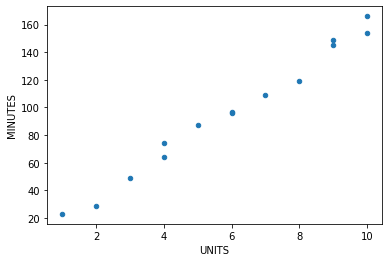

In [45]:
df_raw.plot.scatter(x='UNITS', y='MINUTES')

In [46]:
df_raw.corr(method='pearson').round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [20]:
reg_model = smf.ols(formula='MINUTES~UNITS',data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           8.92e-13
Time:                        11:15:17   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

/home/piai/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


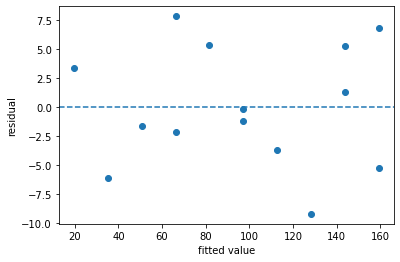

In [21]:
# 잔차의 등분산성
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value'); plt.ylabel('residual')
plt.axhline(y = 0, linestyle = '--')

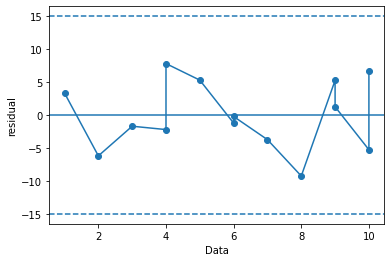

In [22]:
# 등분산성 확인
plt.plot(df_raw['UNITS'], reg_result.resid, marker='o')
plt.xlabel('Data')
plt.ylabel('residual')
plt.axhline(y = 0, linestyle='-')
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = '--')
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = '--')

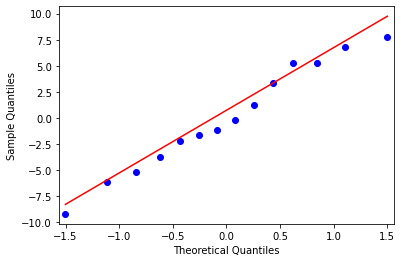

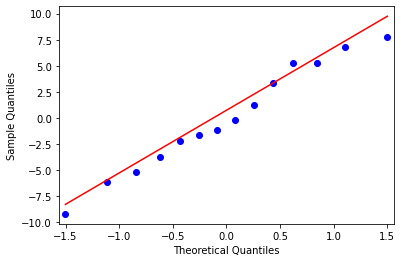

In [23]:
# 정규성 검정
qqplot(reg_result.resid, line = 'q')

sklearn의 linear regressor와 비교해보기

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [38]:
# x = np.array(df_raw['UNITS'])
# y = np.array(df_raw['MINUTES'])
lm = LinearRegression()

In [49]:
lm.fit(df_raw['UNITS'].values.reshape(-1,1),df_raw['MINUTES'])

LinearRegression()

In [54]:
df_raw['UNITS'].values.reshape(1,-1)

array([[ 1,  2,  3,  4,  4,  5,  6,  6,  7,  8,  9,  9, 10, 10]])

In [55]:
df_raw['UNITS'].values.reshape(-1,1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 4],
       [ 5],
       [ 6],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [ 9],
       [10],
       [10]])

In [56]:
lm.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

# 다중 회귀분석 실습
## 1 - 데이터 구성하기

In [58]:
df = pd.read_csv(path + '체질검사.csv', encoding='CP949')

In [60]:
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


## 2 - 변수 간의 경향성 파악 - 그래프 분석

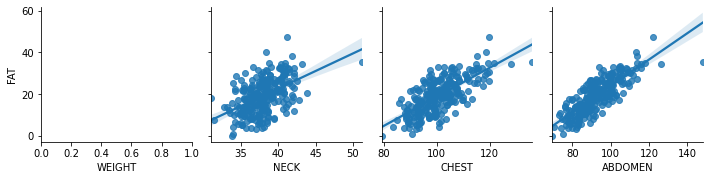

In [68]:
sns.pairplot(df, y_vars='FAT', x_vars = ['WEIGHT','NECK','CHEST','ABDOMEN'], kind = 'reg')

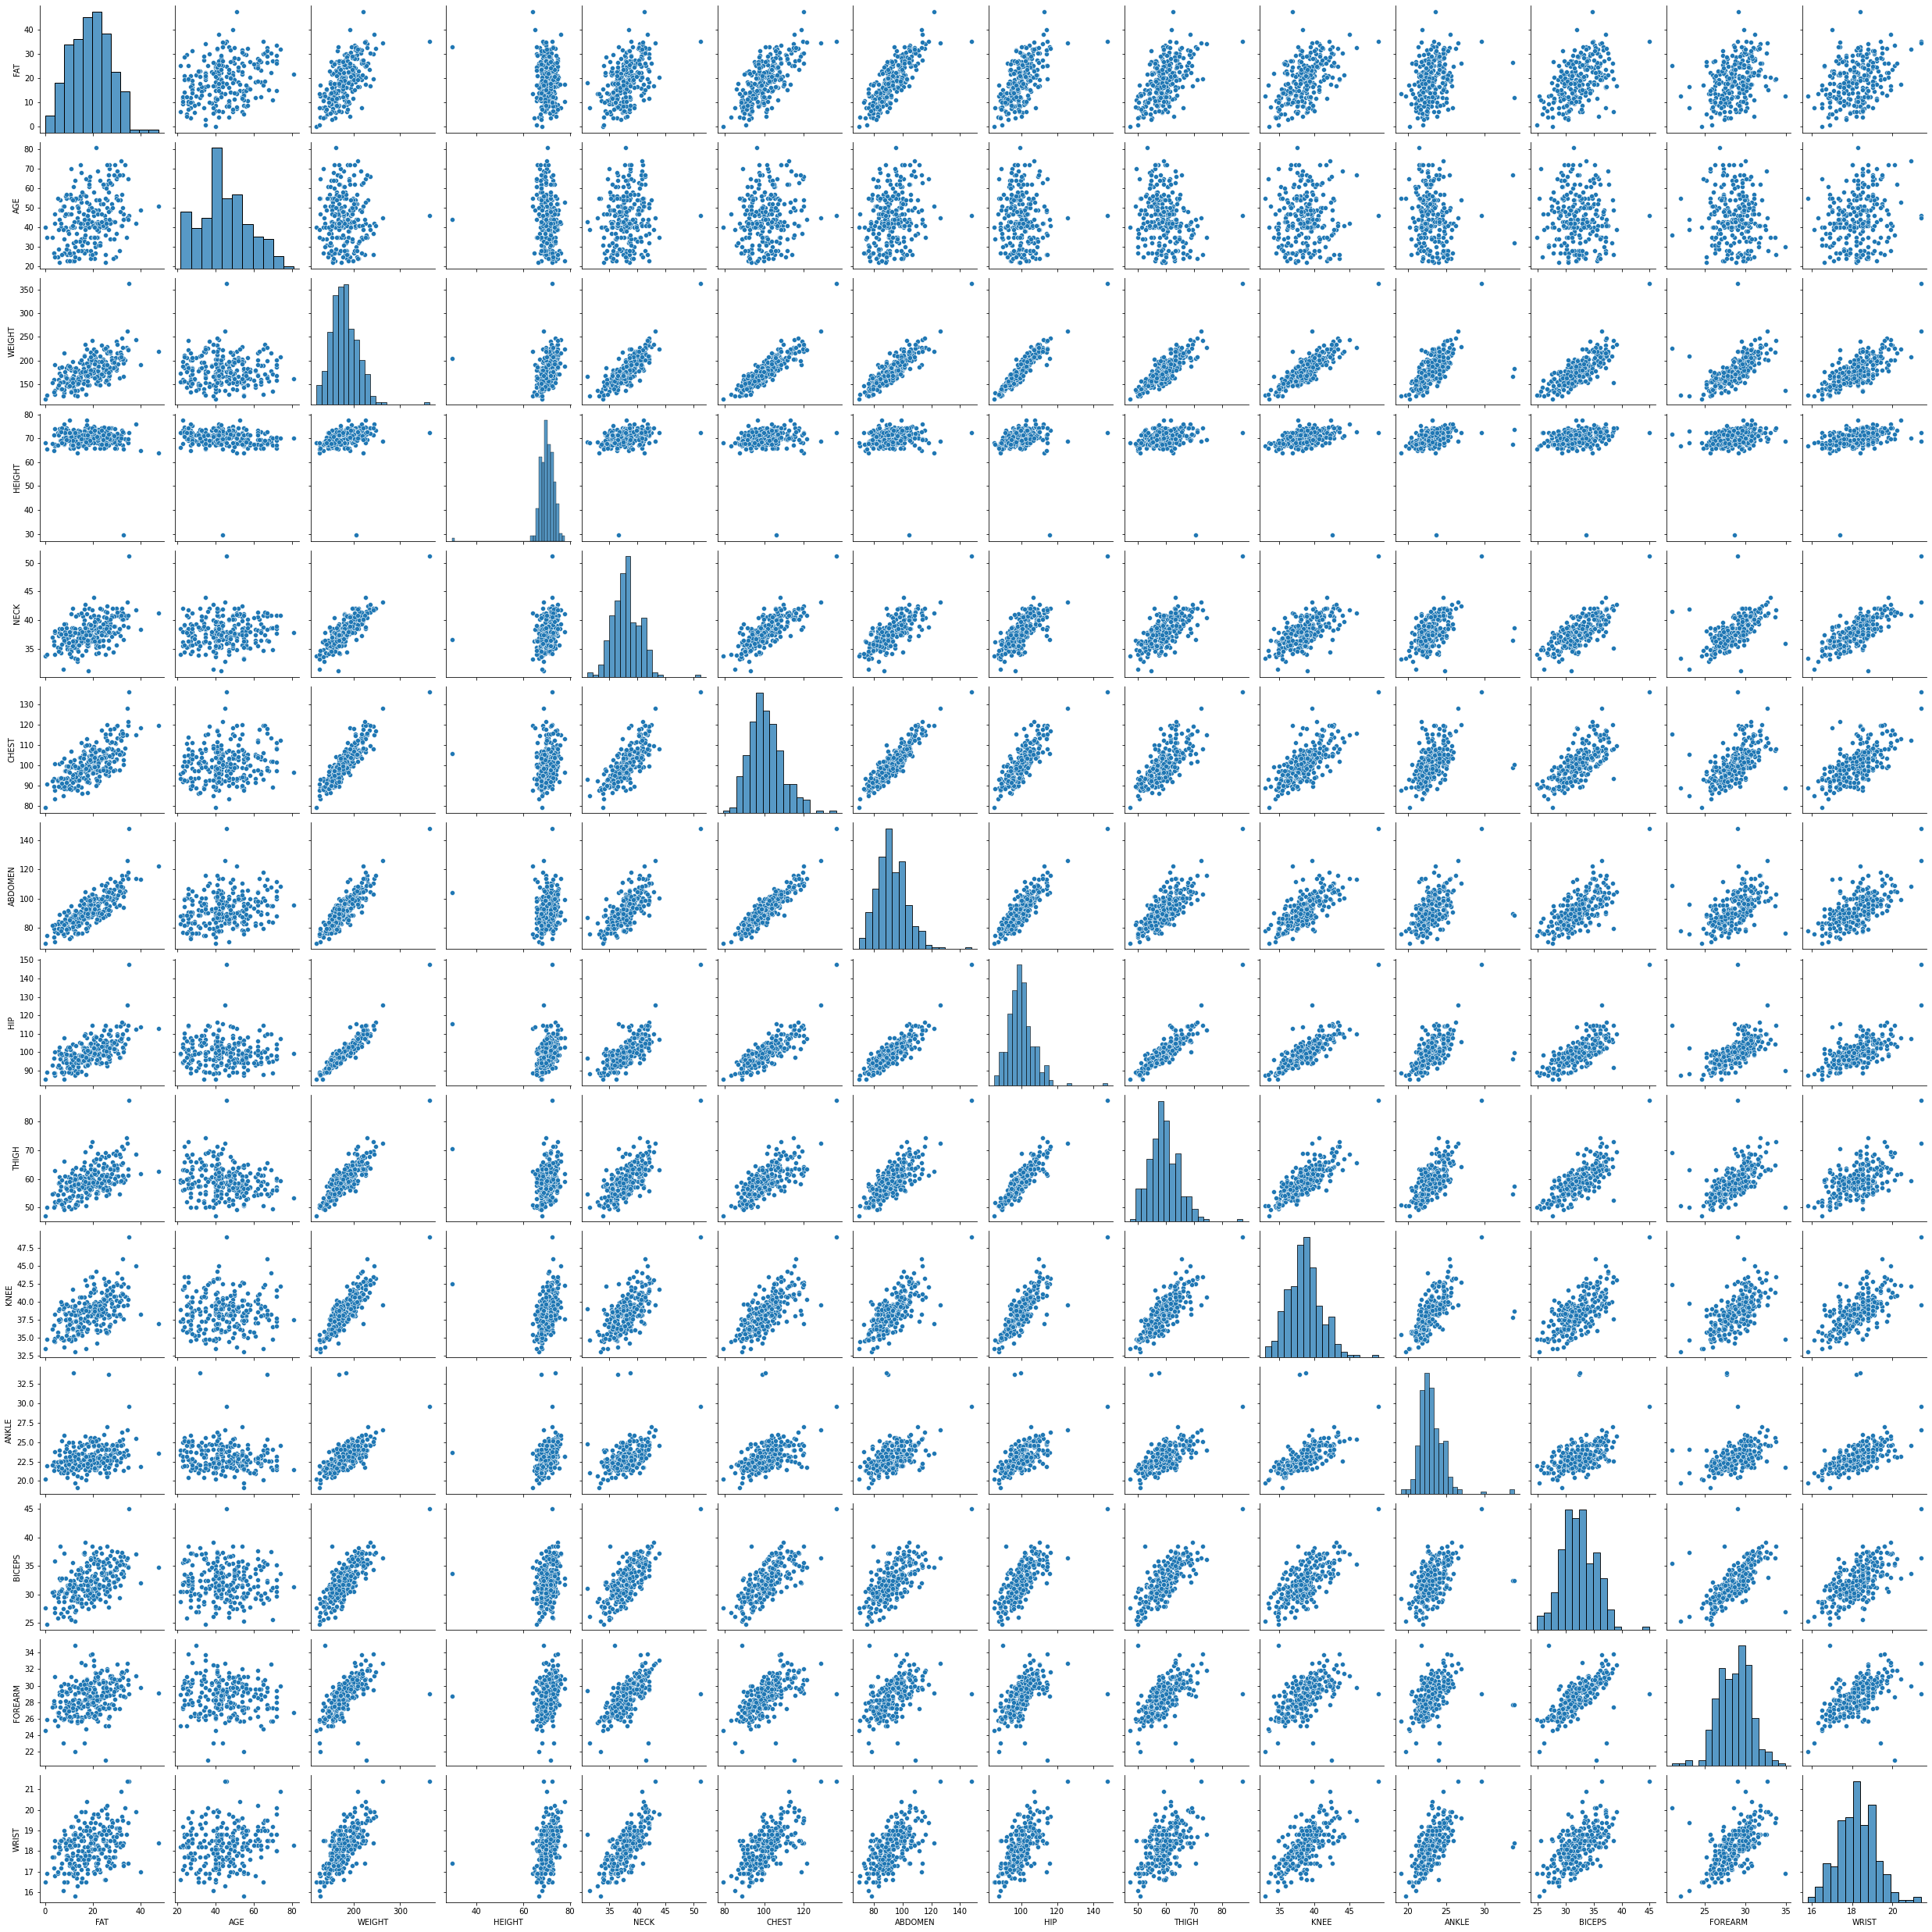

In [71]:
ns.pairplot(df)

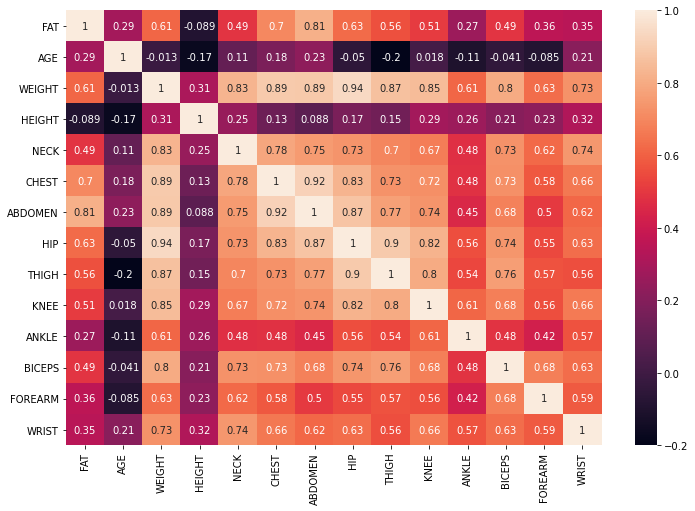

In [76]:
plt.figure(figsize=(12,8))
g = sns.heatmap(df.corr(), annot=True)

## 3 - 회귀모델 생성
### 설명변수 전체

In [100]:
reg_model = smf.ols(formula = 'FAT~AGE+WEIGHT+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST', data = df)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           7.72e-64
Time:                        12:07:18   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

In [101]:
# F검정 결과, 회귀모델은 유의
# T검정 결과, 4개의 유의한 독립변수 확인(NECK, ABDOMEN, FOREARM, WRIST)

### 2. 설명변수간의 다중 공선성 확인

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [80]:
df_x = df.drop('FAT', axis=1)
df_x_const = add_constant(df_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
                                                                # 두번째 인자는 디자인 매트리스의 인덱스
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

,variable,VIF
3,HEIGHT,1.675
10,ANKLE,1.908
12,FOREARM,2.192
1,AGE,2.250
13,WRIST,3.378
11,BICEPS,3.620
4,NECK,4.324
9,KNEE,4.612
8,THIGH,7.778
5,CHEST,9.461


In [102]:
# ABDOMEN, HIP, WEIGHT 이 세 변수가 공선성이 높게 나타남을 확인

다중 공선성 재확인

In [103]:
df_x = df.drop(['FAT','WEIGHT'], axis=1)
df_x_const = add_constant(df_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
                                                                # 두번째 인자는 디자인 매트리스의 인덱스
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

,variable,VIF
2,HEIGHT,1.330
9,ANKLE,1.844
1,AGE,2.154
11,FOREARM,2.192
12,WRIST,3.309
10,BICEPS,3.507
3,NECK,3.956
8,KNEE,4.312
7,THIGH,7.753
4,CHEST,7.883


In [104]:
df_x = df.drop(['FAT','WEIGHT','ABDOMEN'], axis=1)
df_x_const = add_constant(df_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
                                                                # 두번째 인자는 디자인 매트리스의 인덱스
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

,variable,VIF
2,HEIGHT,1.329
1,AGE,1.762
8,ANKLE,1.838
10,FOREARM,2.186
11,WRIST,3.258
9,BICEPS,3.481
3,NECK,3.923
7,KNEE,4.311
4,CHEST,4.883
6,THIGH,7.575


In [105]:
reg_model = smf.ols(formula = 'FAT~AGE+HEIGHT+NECK+CHEST+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST', data = df)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     35.61
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           2.10e-44
Time:                        12:11:31   Log-Likelihood:                -770.51
No. Observations:                 252   AIC:                             1565.
Df Residuals:                     240   BIC:                             1607.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.9228      8.482     -3.292      0.0

## 4 - 후진제거법을 통해 변수를 하나씩 제거해나가도록 한다.

In [111]:
df_y = df['FAT']
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select=8).fit(df_x, df_y)

selected_cols = df_x.columns[rfe.support_]
removed_cols = df_x.columns[~rfe.support_]

print('Selected Variables :{}'.format(selected_cols))
print('Removed Variables :{}'.format(removed_cols))

Selected Variables :Index(['AGE', 'HEIGHT', 'NECK', 'CHEST', 'HIP', 'THIGH', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables :Index(['KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [114]:
reg_model = smf.ols(formula = 'FAT~AGE+HEIGHT+NECK+CHEST+HIP+THIGH+FOREARM+WRIST', data = df)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     49.48
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           7.52e-47
Time:                        13:36:15   Log-Likelihood:                -770.66
No. Observations:                 252   AIC:                             1559.
Df Residuals:                     243   BIC:                             1591.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.9330      8.253     -3.385      0.0

# 144페이지 실습

In [115]:
diabetes = pd.read_csv(path + 'DIABETES.csv')

In [117]:
diabetes.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


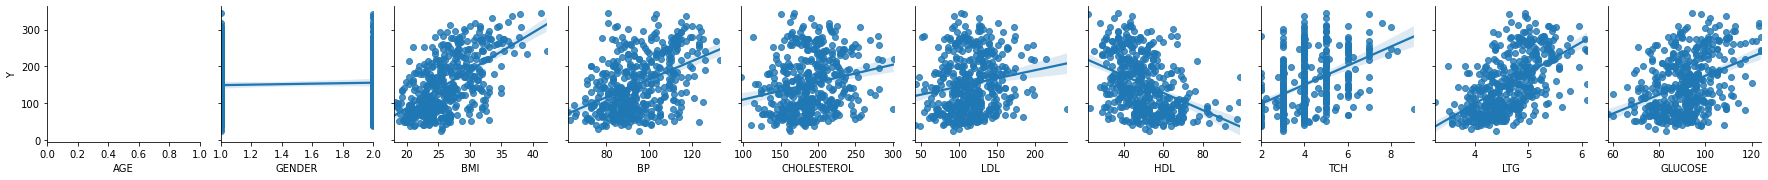

In [121]:
sns.pairplot(diabetes, y_vars = 'Y', x_vars = ['AGE','GENDER','BMI','BP','CHOLESTEROL','LDL','HDL','TCH','LTG','GLUCOSE'], kind='reg')

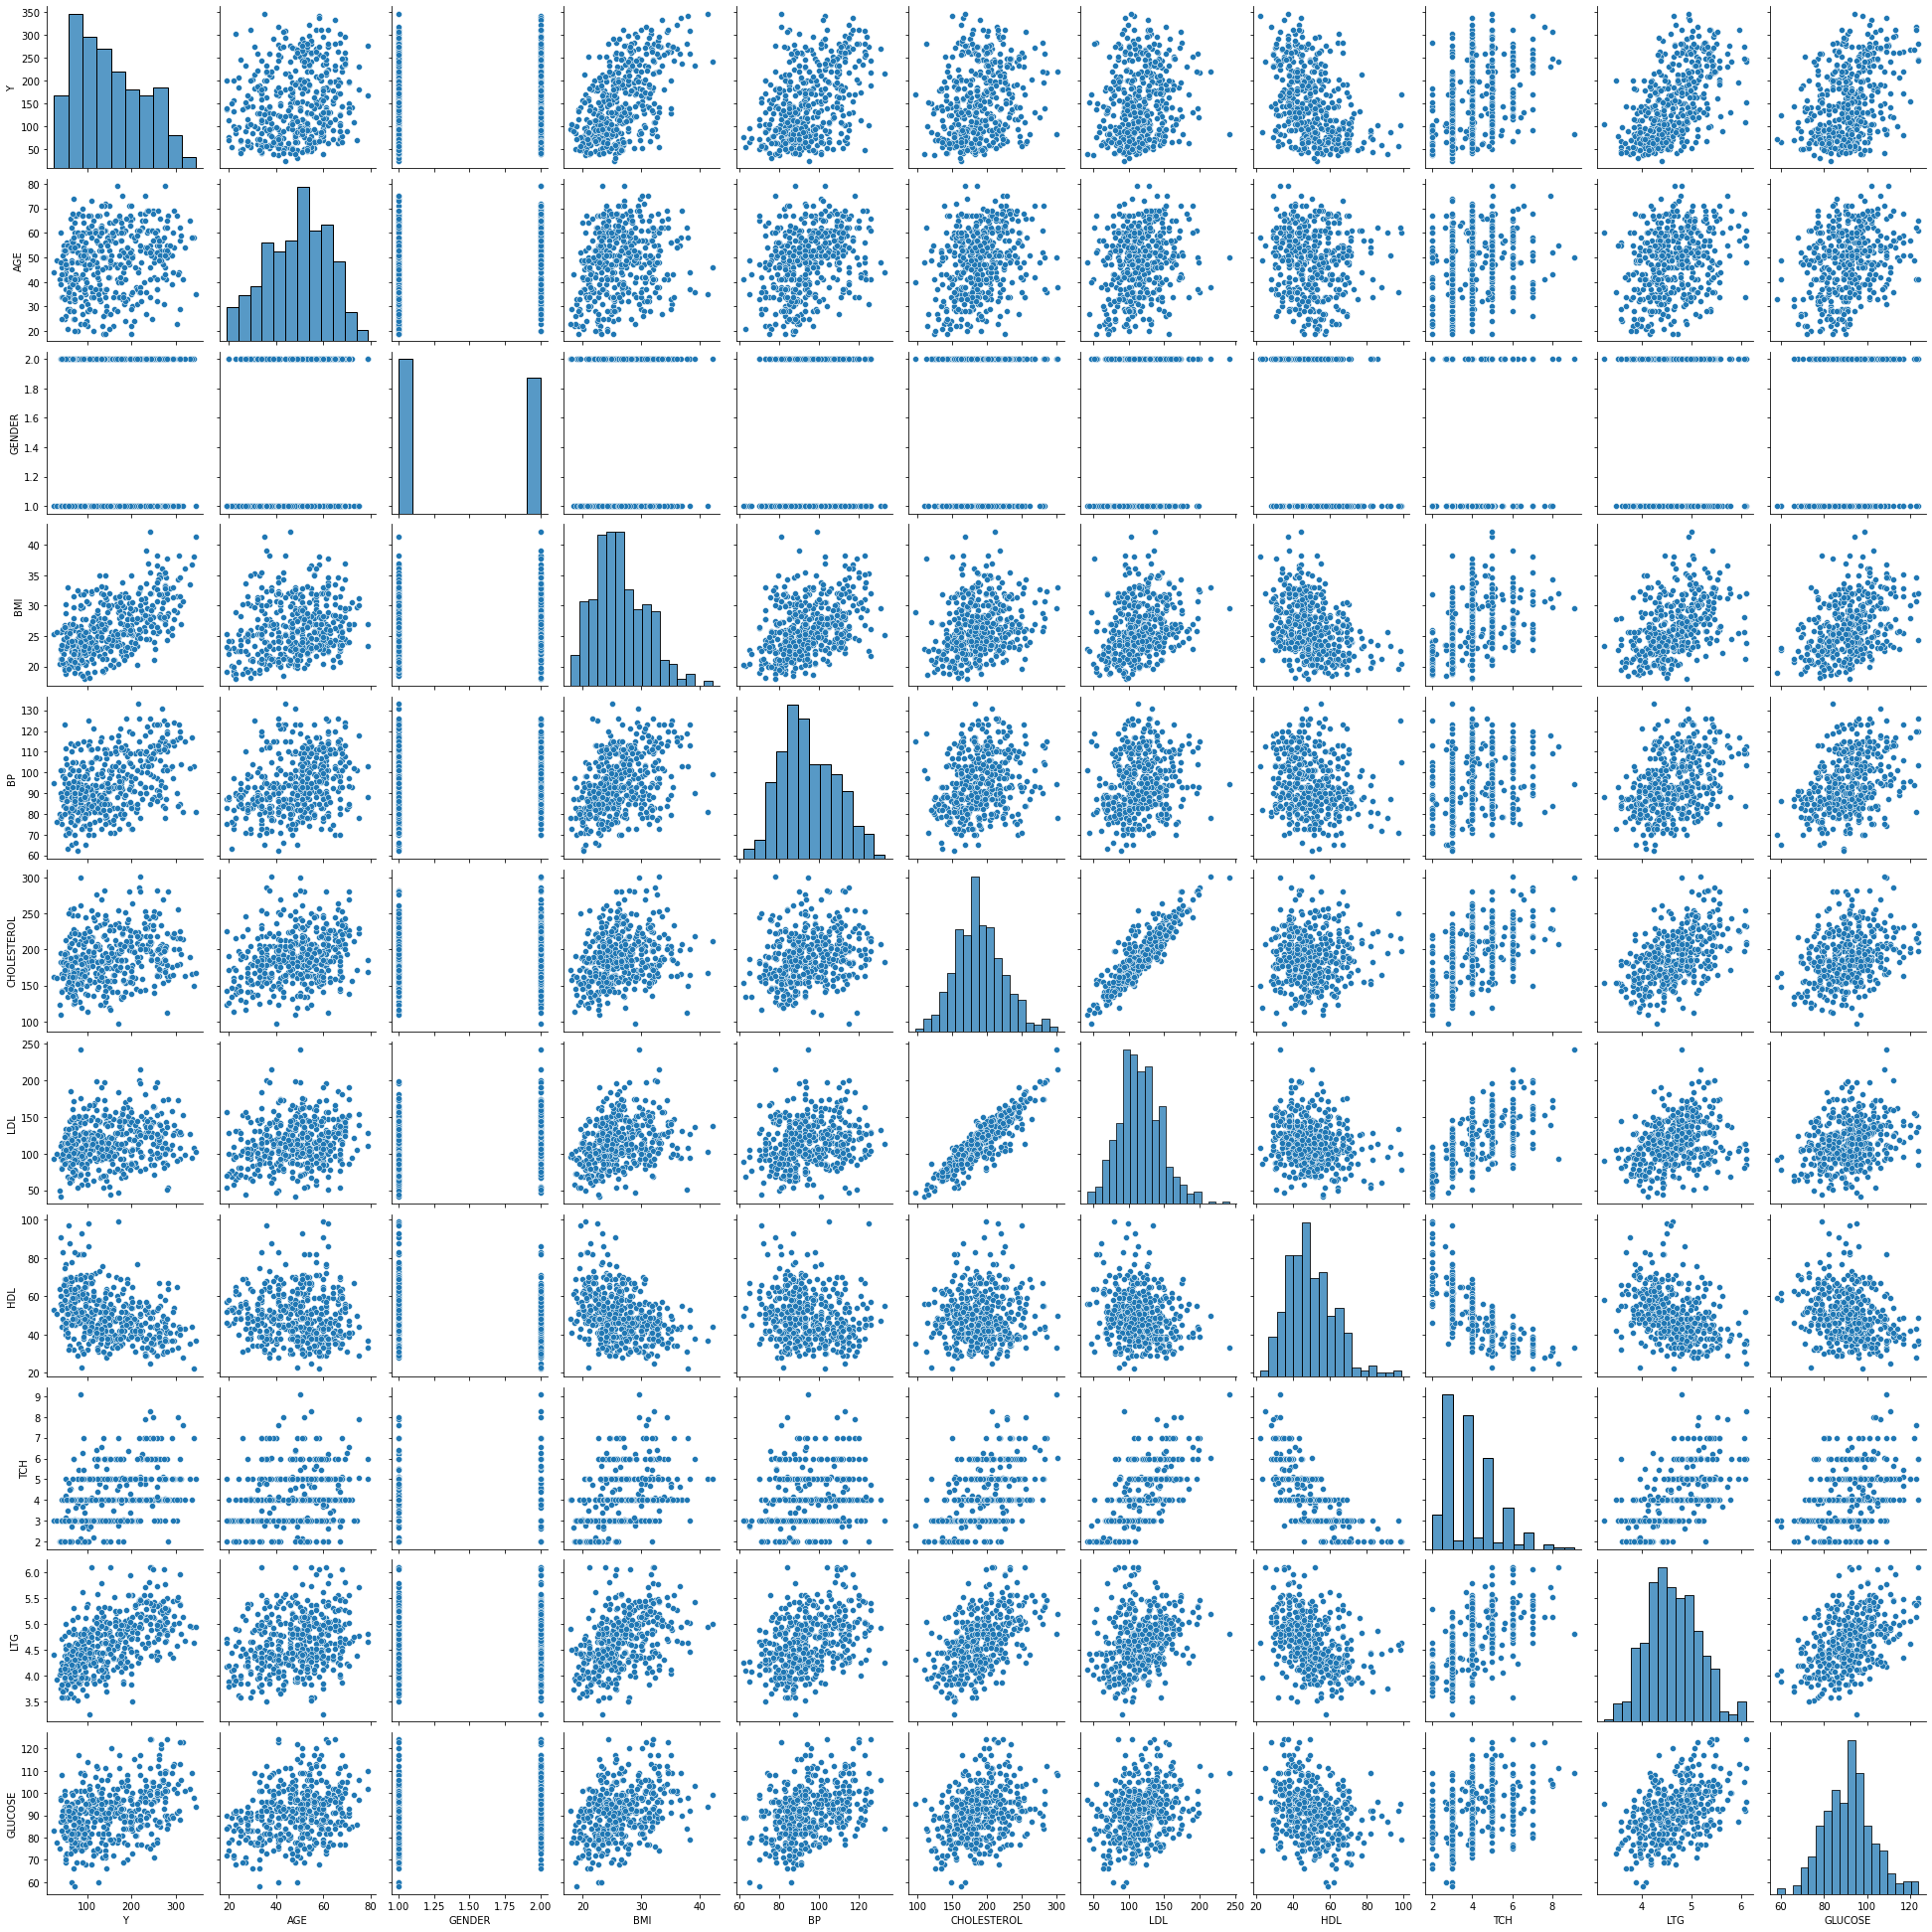

In [122]:
sns.pairplot(diabetes)

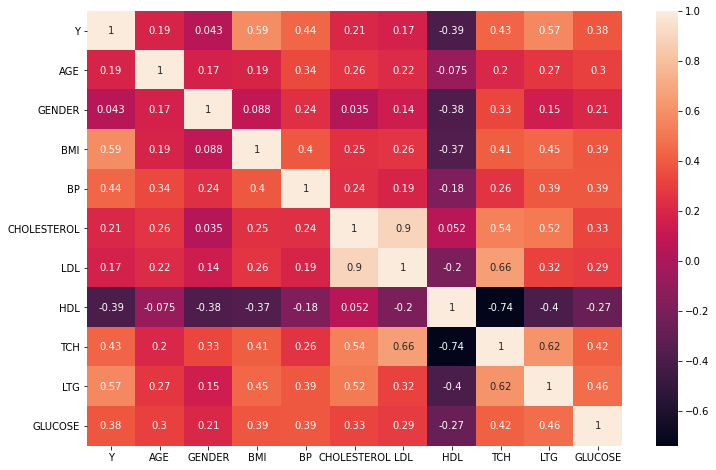

In [123]:
plt.figure(figsize=(12,8))
g = sns.heatmap(diabetes.corr(), annot=True)

In [124]:
# 종속변수와 상관계수 높은 변수 BMI, LTG

In [126]:
reg_model = smf.ols(formula = 'Y~AGE+GENDER+BMI+BP+CHOLESTEROL+LDL+HDL+TCH+LTG+GLUCOSE', data = diabetes)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           3.83e-62
Time:                        13:42:25   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -334.5671     67.455     -4.960      

In [128]:
# 전체변수 설명력 0.507
# 회귀모델 유의 (F값)
# 더빈왓슨 통계량 2, 독립성 가진다.
# 정규성도 가진다.

In [134]:
diabetes_x = diabetes.drop('Y', axis=1)
diabetes_x_const = add_constant(diabetes_x)

diabetes_vif = pd.DataFrame()
diabetes_vif['variable'] = diabetes_x_const.columns
diabetes_vif['VIF'] = [variance_inflation_factor(diabetes_x_const.values,i) for i in range(diabetes_x_const.shape[1])]
                                                                # 두번째 인자는 디자인 매트리스의 인덱스
diabetes_vif.sort_values('VIF', inplace=True)
diabetes_vif.round(3)

,variable,VIF
1,AGE,1.217
2,GENDER,1.278
4,BP,1.459
10,GLUCOSE,1.485
3,BMI,1.509
8,TCH,8.891
9,LTG,10.076
7,HDL,15.402
6,LDL,39.193
5,CHOLESTEROL,59.203


In [135]:
# cholesterol 빼고 다시 진행
diabetes_x = diabetes.drop(['Y','CHOLESTEROL'], axis=1)
diabetes_x_const = add_constant(diabetes_x)

diabetes_vif = pd.DataFrame()
diabetes_vif['variable'] = diabetes_x_const.columns
diabetes_vif['VIF'] = [variance_inflation_factor(diabetes_x_const.values,i) for i in range(diabetes_x_const.shape[1])]
                                                                # 두번째 인자는 디자인 매트리스의 인덱스
diabetes_vif.sort_values('VIF', inplace=True)
diabetes_vif.round(3)

,variable,VIF
1,AGE,1.217
2,GENDER,1.275
4,BP,1.457
9,GLUCOSE,1.484
3,BMI,1.502
8,LTG,2.173
5,LDL,2.927
6,HDL,3.737
7,TCH,7.819
0,const,216.005


In [169]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Y            442 non-null    int64  
 1   AGE          442 non-null    int64  
 2   GENDER       442 non-null    int64  
 3   BMI          442 non-null    float64
 4   BP           442 non-null    float64
 5   CHOLESTEROL  442 non-null    int64  
 6   LDL          442 non-null    float64
 7   HDL          442 non-null    float64
 8   TCH          442 non-null    float64
 9   LTG          442 non-null    float64
 10  GLUCOSE      442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [136]:
# 나머지 변수들은 VIF가 10이하이므로 공선성이 약하다고 판단.

In [185]:
reg_model = smf.ols(formula = 'Y~AGE+GENDER+BMI+BP+LDL+HDL+LTG+TCH+GLUCOSE', data = diabetes)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     50.71
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           3.06e-62
Time:                        14:31:23   Log-Likelihood:                -2387.8
No. Observations:                 442   AIC:                             4796.
Df Residuals:                     432   BIC:                             4837.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -228.4263     37.972     -6.016      0.0

In [158]:
reg_model = smf.ols(formula = 'Y~GENDER+BMI+BP+HDL+LTG', data = diabetes)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     90.26
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           4.75e-65
Time:                        13:52:55   Log-Likelihood:                -2390.1
No. Observations:                 442   AIC:                             4792.
Df Residuals:                     436   BIC:                             4817.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -217.6849     35.764     -6.087      0.0

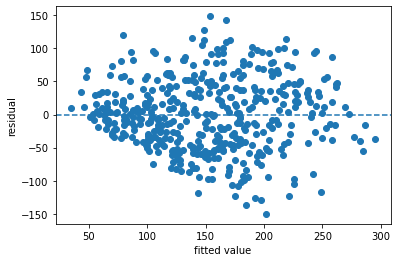

In [160]:
# 잔차의 등분산성
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value'); plt.ylabel('residual')
plt.axhline(y = 0, linestyle = '--')

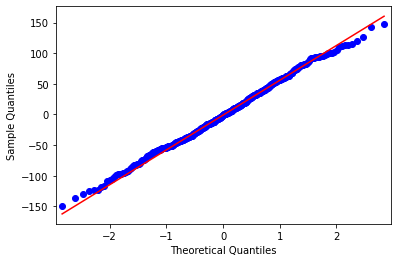

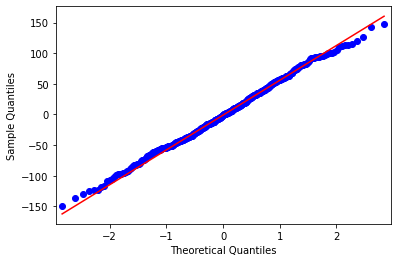

In [170]:
# 정규성 검정
qqplot(reg_result.resid, line='q')

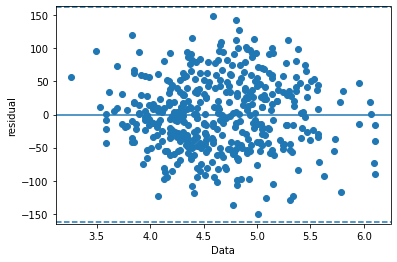

In [183]:
# 등분산성 확인
plt.scatter(diabetes['LTG'], reg_result.resid, marker='o')
plt.xlabel('Data')
plt.ylabel('residual')
plt.axhline(y = 0, linestyle='-')
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = '--')
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = '--')

- 성별이 범주형인데 연속형으로 돌렸다. 이것을 범주형으로 바꿔서 돌려야 한다.
- TCL은 토탈 콜레스테롤인데 이것을 연속형으로 볼 것인지 범주형으로 볼 것인지에 대한 고민을 해야한다.
- BMI를 범주화한다면 어떨까?  

위와 같은 방법들을 생각해보아야 한다.

# 의사결정나무 연습

In [18]:
!pip install graphviz

In [67]:
# 스텝1 패키지 불러오기
# !pip install sklearn
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [68]:
df_raw = pd.read_csv(path + '체질검사.csv')

In [69]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis=1, inplace = False)

In [70]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,\
                                                                test_size = 0.3, random_state = 1234)

In [71]:
# 스텝2 모델 생성

In [72]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set:{:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on training set:{:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set:1.000
Score on training set:0.345


In [73]:
tree_uncustomized

DecisionTreeRegressor(random_state=1234)

In [74]:
train_score, test_score = [], []

para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234,\
                                 min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [75]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.345
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


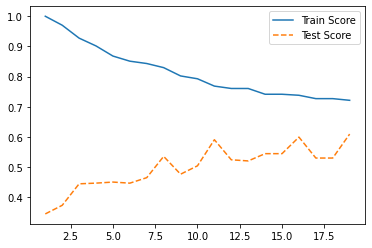

In [76]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

In [79]:
v_feature_name = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_leaf.dot',
                feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [78]:
# step2 - 모델 파라미터 조정
train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,  df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [31]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.345
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


In [32]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split = 20, max_depth = 4, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=20,
                      random_state=1234)

In [33]:
export_graphviz(tree_final, out_file='tree_final.dot', feature_names = v_feature_name, impurity = True, filled = True)

In [34]:
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [35]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace =True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, '변수')

/home/piai/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/snap/jupyter/common/lib/python3.7/

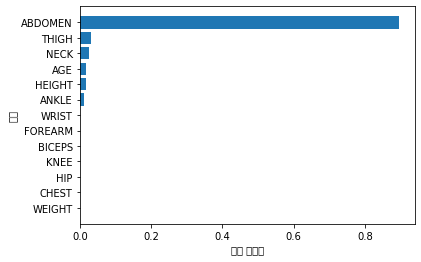

In [36]:
df_importance.sort_values('Importance', ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [235]:
para_depth = [depth for depth in range(1,11)]
para_split = [n_split*2 for n_split in range(2,20)]

estimator = DecisionTreeRegressor()
param_grid = {'criterion':['mse','friedman_mse','mae'],'max_features':['auto','sqrt','log2'],
             'max_depth':para_depth,'min_samples_split': para_split,
             'min_samples_leaf':para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print('\nbest score: \n{}'.format(grid_dt.best_score_.round(3)))


best score: 
0.613


In [236]:
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))


best parameter:
{'criterion': 'mae', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 18, 'min_samples_split': 4}


# 주성분 분석